In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
#from keras.applications.vgg16 import preprocess_input
#from keras.models import Sequential
#from keras.applications import VGG16 
#from keras.layers import Activation, Dense
import os


from keras.preprocessing.image import ImageDataGenerator

import keras 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.callbacks import TensorBoard

import matplotlib.pyplot as plt

In [2]:
#the path of images on disk
#TRAIN_DIR='/home/tasneem/Downloads/PH2.16/train'
#VALID_DIR='/home/tasneem/Downloads/PH2.16/valid/'
#TEST_DIR='/home/tasneem/Downloads/PH2.16/test/'

TRAIN_DIR = '/home/tasneem/Downloads/data/train'
VALID_DIR = '/home/tasneem/Downloads/data/validation'
TEST_DIR = '/home/tasneem/Downloads/data/test'

IMAGE_SIZE=200

In [3]:
def classNum():
    # useful for getting number of files
    image_files = glob(TRAIN_DIR + '/*/*.bmp')
    valid_image_files = glob(VALID_DIR + '/*/*.bmp')
    # getting the number of classes i.e. type of fruits
    folders = glob(TRAIN_DIR + '/*')
    num_classes = len(folders)
    print ('Total Classes = ' + str(num_classes))

In [4]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)



#The above operation is performed so that machine 
#can recognize sheared, zoomed or horizontal versions of same image from training dataset.



train_batches= train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                 batch_size = 15,
                                                class_mode='binary')
valid_batches= ImageDataGenerator().flow_from_directory(VALID_DIR,target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                 batch_size = 5,
                                                class_mode='binary')
test_batches= test_datagen.flow_from_directory(TEST_DIR, target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                 batch_size = 5,
                                                class_mode='binary')



def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
      if type(ims[0]) is np.ndarray:
            ims= np.array(ims).astype(np.uint8)
            if (ims.shape[-1] != 3):
                ims = ims.transpose((0,2,3,1))
            f = plt.figure(figsize=figsize)
            cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows +1
            for i in range(len(ims)):
                sp=f.add_subplot(rows, cols, i+1)
                sp.axis('Off')
                if titles is not None:
                    sp.set_title(titles[i], fontsize=16)
            plt.imshow(ims[i], interpolation=None if interp else 'none')

Found 782 images belonging to 2 classes.
Found 108 images belonging to 2 classes.
Found 510 images belonging to 2 classes.


In [5]:
imgs, labels = next(train_batches)

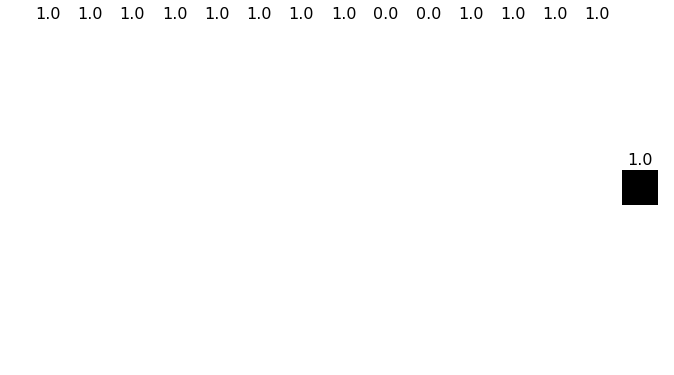

In [6]:
plots(imgs,titles=labels)

Epoch 1/100
32/32 [==============================] - 52s 2s/step - loss: 0.6130 - acc: 0.7458 - val_loss: 0.6035 - val_acc: 0.7200
Epoch 2/100
32/32 [==============================] - 50s 2s/step - loss: 0.5505 - acc: 0.7727 - val_loss: 0.5645 - val_acc: 0.7600
Epoch 3/100
32/32 [==============================] - 72s 2s/step - loss: 0.5530 - acc: 0.7936 - val_loss: 0.5097 - val_acc: 0.8000
Epoch 4/100
32/32 [==============================] - 48s 1s/step - loss: 0.5555 - acc: 0.7667 - val_loss: 0.5073 - val_acc: 0.8000
Epoch 5/100
32/32 [==============================] - 56s 2s/step - loss: 0.5477 - acc: 0.7748 - val_loss: 0.5040 - val_acc: 0.8000
Epoch 6/100
32/32 [==============================] - 51s 2s/step - loss: 0.5093 - acc: 0.7915 - val_loss: 0.7175 - val_acc: 0.6600
Epoch 7/100
32/32 [==============================] - 70s 2s/step - loss: 0.5066 - acc: 0.7958 - val_loss: 0.5100 - val_acc: 0.7800
Epoch 8/100
32/32 [==============================] - 56s 2s/step - loss: 0.5955 - a

32/32 [==============================] - 51s 2s/step - loss: 0.5200 - acc: 0.7846 - val_loss: 0.6534 - val_acc: 0.6800
Epoch 64/100
32/32 [==============================] - 48s 2s/step - loss: 0.5403 - acc: 0.7679 - val_loss: 0.5031 - val_acc: 0.8000
Epoch 65/100
32/32 [==============================] - 49s 2s/step - loss: 0.5304 - acc: 0.7708 - val_loss: 0.5554 - val_acc: 0.8000
Epoch 66/100
32/32 [==============================] - 44s 1s/step - loss: 0.5216 - acc: 0.7894 - val_loss: 0.6613 - val_acc: 0.7400
Epoch 67/100
32/32 [==============================] - 50s 2s/step - loss: 0.5283 - acc: 0.7771 - val_loss: 0.5821 - val_acc: 0.7400
Epoch 68/100
32/32 [==============================] - 47s 1s/step - loss: 0.5155 - acc: 0.7915 - val_loss: 0.8352 - val_acc: 0.6200
Epoch 69/100
32/32 [==============================] - 47s 1s/step - loss: 0.5382 - acc: 0.7790 - val_loss: 0.5052 - val_acc: 0.8200
Epoch 70/100
32/32 [==============================] - 51s 2s/step - loss: 0.5269 - acc: 0

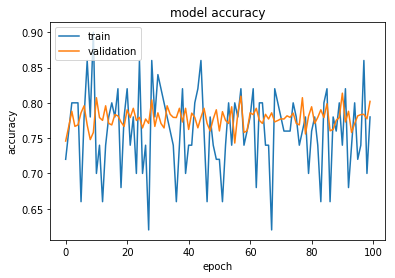

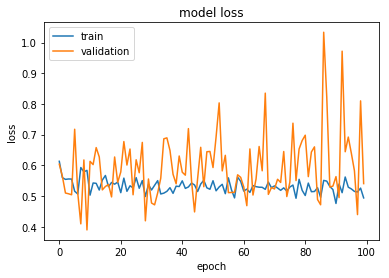

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation ='relu', input_shape=(200, 200, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), strides = 1, activation ='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation ='sigmoid'))



model.compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])







#//هنا نسوي call للداتاسيت ترين
#model.fit(train_batches, valid_batches, epochs=15 , batch_size=41)

#model.fit(TRAIN_DIR, train_batches, batch_size=41, epochs=15, verbose=1,
          #validation_data=(VALID_DIR, valid_batches), callbacks=[])
    
#model.fit(train_batches, valid_batches, batch_size=41, epochs=3, validation_split=0.3)
#history = model.fit_generator(train_batches, 
#				 	steps_per_epoch=3,
#				 	epochs=40,
#					validation_data=valid_batches,
#					validation_steps=1,
#					)
#Python

history =model.fit_generator(train_batches,
                         steps_per_epoch = (160/5),
                         epochs = 100,
                         validation_data = test_batches,
                         validation_steps = (20/2))


model.summary()




# list all data in history
print(history.history.keys())

plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
